In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import warnings

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

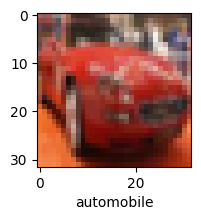

In [9]:
plot_sample(X_train, y_train, 5)

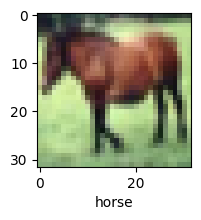

In [10]:
plot_sample(X_train, y_train, 7)

Normalizing the Training Data

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Neural Network Construction

In [12]:
from keras.models import Sequential
model = Sequential([
    # CNN
    layers.Conv2D(filters = 32, activation = 'relu', kernel_size = (3, 3), input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, activation = 'relu', kernel_size = (3, 3)),
    layers.MaxPooling2D((2,2)),

    # Dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')

])

In [13]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4930 - accuracy: 0.4598
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1317 - accuracy: 0.6017
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9951 - accuracy: 0.6528
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9156 - accuracy: 0.6819
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8481 - accuracy: 0.7051
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7972 - accuracy: 0.7238
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7475 - accuracy: 0.7398
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7083 - accuracy: 0.7542
Epoch 9/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.6737 - accuracy: 0.7668
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 23ms/step - loss: 0.9448 - accuracy: 0.6878


[0.9448303580284119, 0.6877999901771545]

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

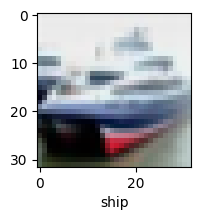

In [17]:
y_test = y_test.reshape(-1)
plot_sample(X_test, y_test, 1)

In [18]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[1.6230341e-02, 2.2781596e-03, 6.0537332e-03, 7.0252138e-01,
        5.2287226e-04, 2.4252079e-01, 8.9762500e-03, 4.6683921e-04,
        1.6773639e-02, 3.6560406e-03],
       [2.1403479e-05, 5.8329143e-03, 8.5501192e-08, 3.2675709e-07,
        5.0210733e-09, 2.0217052e-09, 9.0762864e-10, 4.5569196e-10,
        9.9403721e-01, 1.0792661e-04],
       [1.6136214e-02, 6.8334900e-02, 9.7301987e-04, 2.9654998e-02,
        8.0827664e-04, 1.2855793e-03, 1.6268084e-04, 1.5152558e-03,
        8.7161285e-01, 9.5161870e-03],
       [6.1793375e-01, 5.0465554e-02, 9.9349832e-03, 1.0089631e-02,
        2.3618333e-02, 4.6903852e-04, 1.1157792e-04, 5.2487757e-03,
        2.7925631e-01, 2.8719436e-03],
       [8.9936493e-06, 2.1590100e-05, 2.0289637e-02, 1.7297674e-02,
        3.8546577e-01, 5.0349545e-04, 5.7607001e-01, 1.3953004e-04,
        1.9051316e-04, 1.2802696e-05]], dtype=float32)

In [19]:
y_class = [np.argmax(element) for element in y_pred]
y_class[:5]

[3, 8, 8, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [21]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

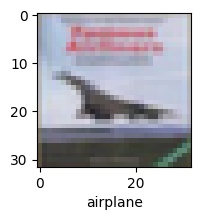

In [25]:
plot_sample(X_test, y_test, 3)

In [26]:
classes[y_class[3]]

'airplane'

Evaluation

In [29]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.78      0.82      0.80      1000
           2       0.64      0.56      0.60      1000
           3       0.63      0.28      0.39      1000
           4       0.63      0.66      0.65      1000
           5       0.49      0.76      0.59      1000
           6       0.71      0.81      0.76      1000
           7       0.73      0.75      0.74      1000
           8       0.84      0.76      0.80      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000

